In [2]:
# path_ = r'C:\Users\Itay\Documents\ipcaLocal\Centroid Figures for Jialin Paper'
path_='.'

In [22]:
import mpl_toolkits.mplot3d as a3
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.linalg as sp
import math
import os
import glob 
import torch as th
from random import choices
import tqdm
import pickle
# save path 
save_path = path_
num_chkpoints = 2043

t_jialin = np.array([    0,     1,    63,   125,   187,   249,   251,   313,   375,
      437,   499,   501,   563,   625,   687,   749,   751,   813,
      875,   937,   999,  1001,  1063,  1125,  1187,  1249,  1500,
     1750,  2000,  2250,  2500,  2750,  3000,  3250,  3500,  3750,
     4000,  4250,  4500,  4750,  5000,  5250,  5500,  5750,  6000,
     6250,  6500,  7250,  8250,  9250, 10250, 11250, 12250, 13250,
    14250, 15250, 16250, 19000, 22750, 26500, 30250, 34000, 37750,
    41500, 45250, 49000, 50000])
t_save = set(list(np.arange(1000))+list(t_jialin) + list(np.arange(15000,35000,20)))
t_save = list(t_save)
t_save.sort()
 
jialin_ind = [np.where(t_save==k)[0][0] for k in t_jialin]

label_m=['AM',
 'GM',
 'HM',
 'Sqrt AM',
 'Bhattacharyya',
 "Jeffrey's"]

# training data

In [4]:
xp =pickle.load(open('/home/ubuntu/ext_vol/inpca/notebooks/data/inpca_coord.p', 'rb'))

In [25]:
import pandas as pd
xp = pd.DataFrame(xp, columns=[f'x{i}' for i in range(9)])

In [26]:
xp['Centroid'] = 'original'
for m in range(6):
    xp.loc[2010+67*m:2010+67*(m+1), 'Centroid'] = label_m[m]

In [37]:
xp['style'] = '1'

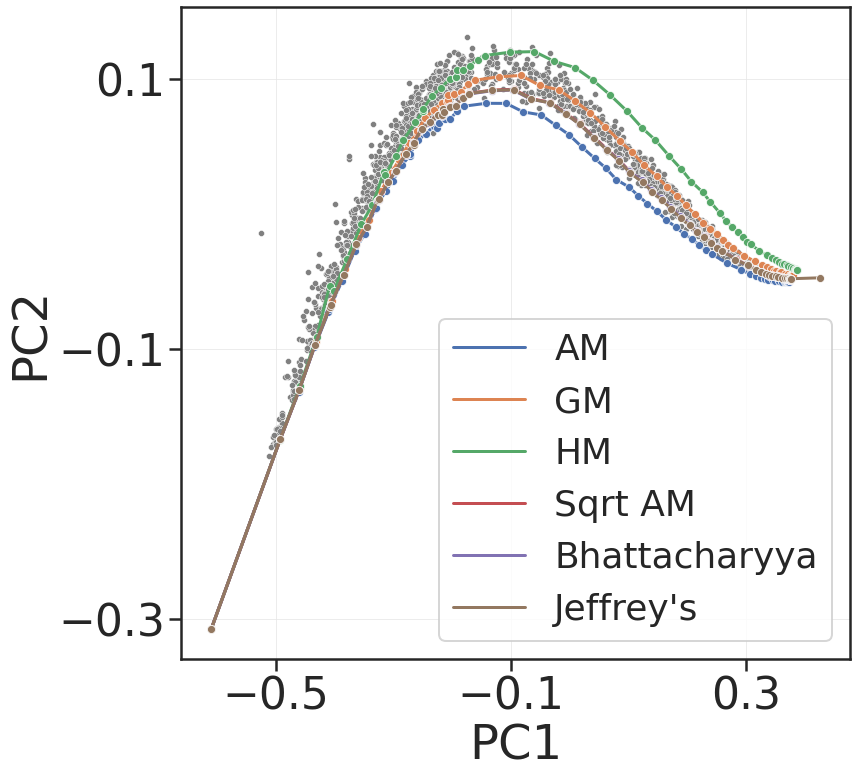

In [78]:
f, ax=plt.subplots(figsize=(12,12))
import seaborn as sns
sns.set(context='poster',
        style='ticks',
        font_scale=2,
        rc={'axes.grid': True,
            'grid.color': '.9',
#             'lines.linewidth': 0.5,
            'grid.linewidth': 0.75})
sns.lineplot(data=xp.iloc[2010:], x='x0',y='x1', hue='Centroid',ax=ax, marker='.',  markersize=16)
sns.scatterplot(data=xp.iloc[:2010], x='x0',y='x1', color='grey', ax=ax, s=36)
ax.set(xlabel='PC1', ylabel='PC2',xticks=[-0.5,-0.1,0.3], yticks=[-0.3, -0.1, 0.1])
plt.legend(fontsize=36)

In [79]:
f.savefig('training_err_averaging_traj.pdf', bbox_inches='tight')

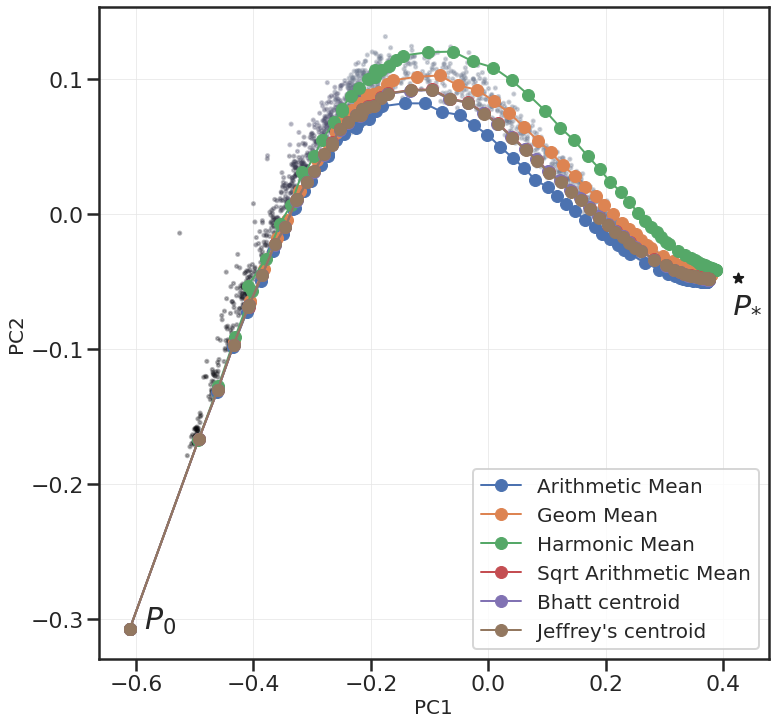

In [7]:
fig = plt.figure(figsize=(12,12))
import seaborn as sns
sns.set(context='poster',
        style='ticks',
        font_scale=1,
        rc={'axes.grid': True,
            'grid.color': '.9',
#             'lines.linewidth': 0.5,
            'grid.linewidth': 0.75})
plt.scatter(xp[:2010,0],xp[:2010,1],s=10,c=np.array(jialin_ind*30)/max(jialin_ind),cmap = 'bone', alpha = 0.3)
#label_m = [r'arithmetic mean',r'geom mean',r'harmonic mean',r'sqrt arithmetic mean',r' bhatt centroid ',r' Jeffrey centroid ']
for m in range(6):
    plt.plot(xp[2010+67*m:2010+67*(m+1),0],xp[2010+67*m:2010+67*(m+1),1],'o-',linewidth=2, label=label_m[m])
plt.text(xp[-1,0]-0.01,xp[-1,1]-0.025,r'$P_{*}$',fontsize=30)
plt.scatter(xp[-1,0],xp[-1,1],c='k',marker= '*',s=100)

plt.text(xp[0,0]+0.025,xp[0,1],r'$P_{0}$',fontsize=30)

plt.legend(fontsize=20)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)

#plt.tight_layout()
plt.savefig('training_err_averaging_traj.pdf', dpi=300)


# test data 

In [7]:
xp_test =pickle.load(open(os.path.join(save_path,'inpca_coord_test.p'), 'rb'))

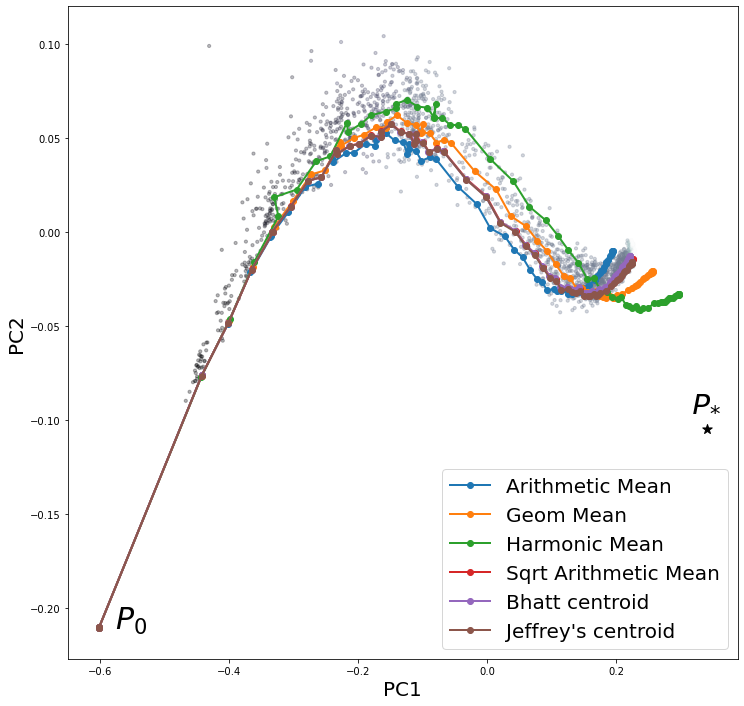

In [8]:
fig = plt.figure(figsize=(12,12))
plt.scatter(xp_test[:2010,0],xp_test[:2010,1],s=10,c=np.array(jialin_ind*30)/max(jialin_ind),cmap = 'bone', alpha = 0.3)
for m in range(6):
    plt.plot(xp_test[2010+67*m:2010+67*(m+1),0],xp_test[2010+67*m:2010+67*(m+1),1],'o-',linewidth=2, label=label_m[m])
plt.scatter(xp_test[-1,0],xp_test[-1,1],c='k',marker= '*',s=100)
plt.text(xp_test[-1,0]-0.025,xp_test[-1,1]+0.01,r'$P_{*}$',fontsize=30)
plt.text(xp_test[0,0]+0.025,xp_test[0,1],r'$P_{0}$',fontsize=30)

plt.axis('tight')
plt.legend(fontsize=20)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.savefig('validation_err_averaging_traj.pdf', dpi=300)

In [10]:
progress_err_ds= pickle.load(open(os.path.join(save_path,'progress_err_ds.p'), 'rb'))

In [12]:

progress_AM = progress_err_ds['progress_AM'] 
validation_err_AM = progress_err_ds['validation_err_AM'] 

progress_GM =progress_err_ds['progress_GM']
validation_err_GM =progress_err_ds['validation_err_GM'] 

progress_HM =progress_err_ds['progress_HM']
validation_err_HM =progress_err_ds['validation_err_HM']

progress_sqrtAM = progress_err_ds['progress_sqrtAM']
validation_err_sqrtAM  = progress_err_ds['validation_err_sqrtAM']

progress_bhatt = progress_err_ds['progress_Bhatt']
validation_err_bhatt = progress_err_ds['validation_err_Bhatt']

progress_skl = progress_err_ds['progress_sKL']
validation_err_skl =progress_err_ds['validation_err_sKL'] 




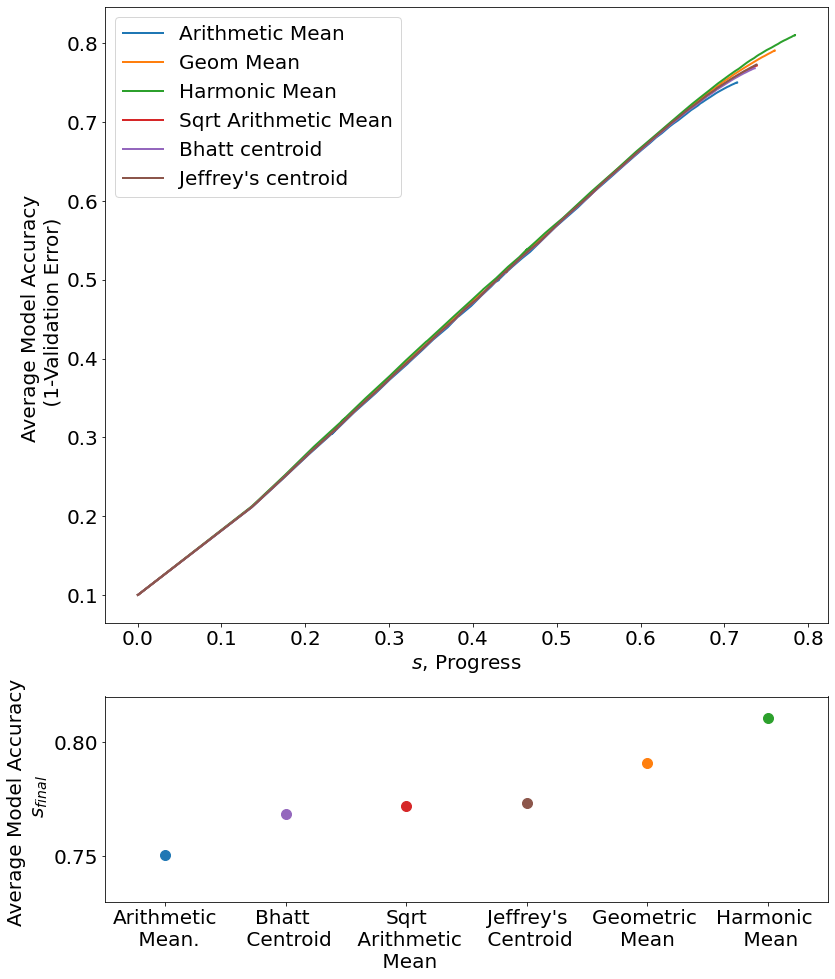

In [14]:
import matplotlib
font = {
        'size'   : 20}

matplotlib.rc('font', **font)
label_m = [r'Arithmetic Mean',r'Geom Mean',r'Harmonic Mean',r'Sqrt Arithmetic Mean',r'Bhatt centroid ',"Jeffrey's centroid"]
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},figsize=(12,14))

a0.plot(progress_AM,validation_err_AM,label = label_m[0],linewidth=2)
a0.plot(progress_GM,validation_err_GM,label = label_m[1],linewidth=2)

a0.plot(progress_HM,validation_err_HM,label = label_m[2],linewidth=2)
a0.plot(progress_sqrtAM,validation_err_sqrtAM,label = label_m[3],linewidth=2)
a0.plot(progress_bhatt,validation_err_bhatt,label = label_m[4],linewidth=2)
a0.plot(progress_skl,validation_err_skl,label = label_m[5],linewidth=2)
a0.legend()
a0.set_ylabel('Average Model Accuracy \n (1-Validation Error)')
a0.set_xlabel('$s$, Progress')
#plt.savefig('progress_vs_validation_err_averaging.pdf', dpi=300)

a1.scatter(0,validation_err_AM[-1],s=100)
a1.scatter(4,validation_err_GM[-1],s=100 )
a1.scatter(5,validation_err_HM[-1],s=100)
a1.scatter(2,validation_err_sqrtAM[-1] ,s=100)
a1.scatter(1,validation_err_bhatt[-1],s=100)
a1.scatter(3,validation_err_skl[-1] ,s=100)


a1.set_xticks([0,1,2,3,4,5],['Arithmetic\n Mean.','Bhatt \n Centroid','Sqrt\n Arithmetic\n Mean','Jeffrey\'s\n Centroid','Geometric \nMean','Harmonic \n Mean'])
a1.set_yticks([0.75,0.80])
a1.axis([-0.5,5.5,0.73,0.82])
a1.set_ylabel('Average Model Accuracy \n $s_{final}$')
#plt.xlabel('Type of Averaging')
f.tight_layout()
f.savefig('progress_vs_validation_err_averaging.pdf', dpi=300)
